# Try out SHAP 

In [2]:
from ml_functions import import_proteomics_data_for_ml

In [12]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap as shap
import xgboost

In [8]:
data_dict = import_proteomics_data_for_ml()
X = data_dict['X']
y = data_dict['y']
X_mean = data_dict['X_mean']
y_mean = data_dict['y_mean']


,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,PP_0013,PP_0017,PP_0018,PP_0019,PP_0020,PP_0029,PP_0030,PP_0046,PP_0052,PP_0058,PP_0059,PP_0060,PP_0061,PP_0063,PP_0064,PP_0065,PP_0066,PP_0067,PP_0068,PP_0070,PP_0072,PP_0073,PP_0074,PP_0076,PP_0082,PP_0083,PP_0085,PP_0088,PP_0089,PP_0091,...,PP_5330,PP_5331,PP_5332,PP_5335,PP_5336,PP_5338,PP_5340,PP_5341,PP_5345,PP_5346,PP_5347,PP_5350,PP_5351,PP_5352,PP_5353,PP_5354,PP_5365,PP_5366,PP_5378,PP_5379,PP_5380,PP_5383,PP_5391,PP_5392,PP_5395,PP_5409,PP_5411,PP_5412,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,1.000494,1.012011,1.239528,1.079339,1.895735,0.767953,0.447143,0.108579,1.460802,1.623505,1.165289,1.039691,1.019482,0.755657,1.940664,0.717888,1.018689,0.866672,1.039098,1.034908,1.131884,1.084282,1.494169,0.000000,0.937132,0.978100,1.034069,1.137548,1.051100,0.000000,...,1.431182,1.022472,0.588427,1.081294,0.980931,1.289523,0.000000,0.000000,1.469568,0.975344,1.016532,1.074177,1.201533,0.942596,0.589422,0.000000,1.243925,1.275428,1.019182,1.504491,0.641609,1.272469,1.266790,0.959531,1.181967,0.905193,0.964631,1.155528,0.950618,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,1.083393,0.887574,0.569669,0.911478,0.476563,0.824466,1.147192,1.361217,0.789773,1.031962,0.120563,0.955911,0.947520,1.744938,2.153707,0.734140,1.016895,0.964551,0.869575,1.036114,1.045327,0.973935,0.572909,0.558188,1.056260,0.992482,0.880345,1.240603,1.128827,1.618171,...,1.211474,1.031988,1.144666,0.909682,0.945595,0.620645,1.618171,1.618171,0.849615,0.903556,0.919521,0.914794,1.291192,1.015848,1.079986,0.183319,1.556963,1.233183,1.237028,0.268645,1.016455,2.864442,1.745807,1.860843,1.006193,0.980156,1.024481,0.976750,1.020609,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,1.064094,1.090609,0.740764,1.403994,1.690192,1.530660,0.639907,0.000000,0.973707,1.158371,0.849329,1.008152,1.077868,0.495360,0.000000,0.796101,0.993706,1.000606,1.133725,1.081554,1.067968,1.074824,1.856196,0.000000,1.078473,1.065198,0.957365,1.203755,0.908847,0.000000,...,1.271460,0.634985,0.635850,0.874529,0.975327,1.326728,0.000000,0.000000,1.140602,1.068353,0.965703,0.861093,1.187832,1.037558,1.382707,0.000000,1.647689,0.471346,1.006377,1.007982,1.466731,0.000000,0.910596,1.315707,1.115731,1.035472,0.885177,1.238983,0.985870,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,1.080871,0.981087,1.268333,1.062539,0.133539,1.199631,1.092254,2.021677,0.916947,1.368253,1.207668,1.043709,1.112935,1.253891,0.288413,1.809792,1.053793,1.388006,1.091698,1.054955,1.065939,1.058460,0.525587,5.116809,1.014114,1.079011,1.278152,0.951532,0.936968,1.540679,...,1.362939,0.515262,1.912689,1.236691,1.044763,2.154054,1.540679,1.540679,0.089693,1.182899,1.220206,1.267710,1.496590,0.987385,0.846089,6.381527,0.722459,0.401764,1.073446,1.334064,1.414842,1.133197,0.214968,0.773685,0.855734,0.874099,1.225840,1.099965,1.029636,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,0.989079,1.138870,1.296153,1.286947,0.595161,0.910584,1.220432,0.034267,0.663499,1.226764,1.108175,0.937122,0.940688,0.629559,2.220417,0.746119,1.084863,0.818556,1.035212,0.977323,1.147338,0.97556

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_mean, y_mean, test_size=0.2, random_state=0)


In [21]:
model_xgb = xgboost.XGBRegressor(n_estimators = 100, max_depth = 2).fit(X_train,y_train)
explainer_xgb = shap.Explainer(model_xgb, X_test)
shap_values_xgb = explainer_xgb(X_mean)


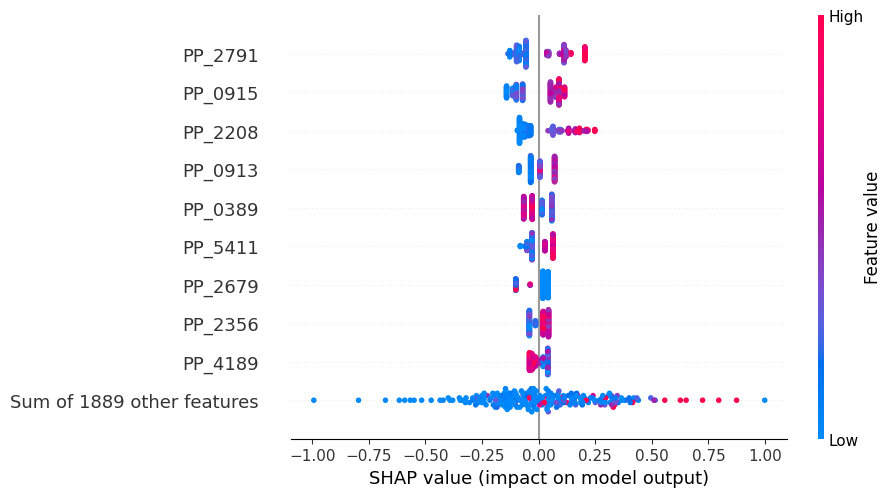

In [19]:
shap.plots.beeswarm(shap_values_xgb)

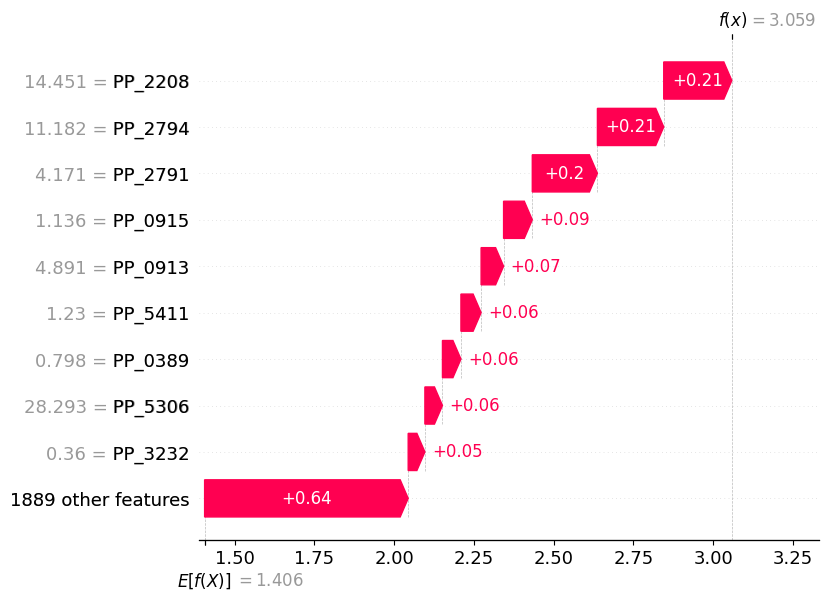

In [26]:
max_idx = np.where(y_mean == y_mean.max())[0][0]
shap.plots.waterfall(shap_values_xgb[max_idx])


In [28]:
X_mean.iloc[max_idx, X_mean.columns == 'PP_2208']

PP_2208    14.451049
Name: PP_0751_PP_0814_c3, dtype: float64

In [ ]:
max_idx = np.where(y_mean == y_mean.max())[0][0]
shap.plots.waterfall(shap_values_xgb[max_idx])


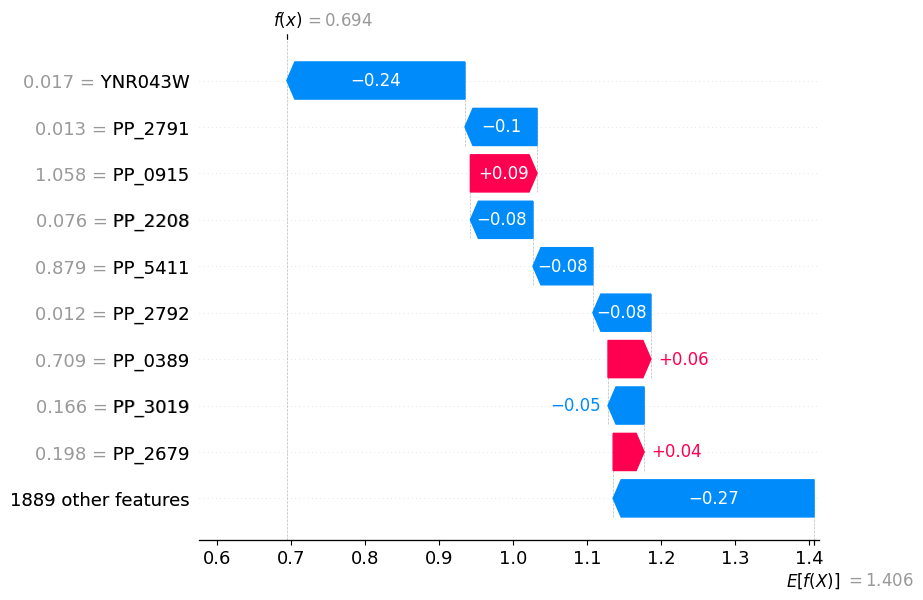

In [27]:
min_idx = np.where(y_mean == y_mean.min())[0][0]
shap.plots.waterfall(shap_values_xgb[min_idx])